# Estimating Price of Houses

## The Dataset provides house sale prices in kingcounty including seattle

### Developed various models and evaluated the accuracy of each Model

# Importing Needed Packages:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

# Importing Dataset:

## Dataset contains information about 21,613 Houses sold

In [2]:
File='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/coursera/project/kc_house_data_NaN.csv'
df=pd.read_csv(File)


# Analysing Data:

In [3]:
df

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420,101930,1.0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,6,1321400060,20140627T000000,257500.0,3.0,2.25,1715,6819,2.0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,7,2008000270,20150115T000000,291850.0,3.0,1.50,1060,9711,1.0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,8,2414600126,20150415T000000,229500.0,3.0,1.00,1780,7470,1.0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,9,3793500160,20150312T000000,323000.0,3.0,2.50,1890,6560,2.0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


### Checking out the Datatypes of each column:

In [4]:
print(df.dtypes)

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


### Information of each column:

#### Date: Date on which house was sold
#### Price: Prediction Price( TARGET )
#### bedrooms: Number of Bedrooms in House
#### bathrooms: Number of Bathrooms in House
#### sqft_living: Square footage of the home
#### Sqft_lot: Square footage of the lot
#### Floors :Total floors (levels) in house
#### Waterfront :House which has a view to a waterfront
#### View: Has been viewed
#### Condition :How good the condition of house overall
#### Grade: overall grade given to the housing unit, based on King County grading system
#### sqft_above: square footage of house apart from basement
#### sqft_basement: square footage of the basement
#### yr_built: Built year
#### yr_renovated :Year when house was renovated
#### zipcode: zip code
#### lat: latitude coordinates
#### long: Longitude coordinates

# Descriptive Exploration of Dataset

In [5]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
#dropping columns Unnamed and id
df.drop(['id','Unnamed: 0'],axis=1,inplace=True)
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Checking if any columns has null values

In [7]:
df.isnull().sum()

date              0
price             0
bedrooms         13
bathrooms        10
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
grade             0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
zipcode           0
lat               0
long              0
sqft_living15     0
sqft_lot15        0
dtype: int64

### In the above analysis we got to know that there are 13 and 10 empty blocks in Bedrooms and bathrooms respectively

## Lets replace the those missing values with the mean of the remaining values in respective column

In [8]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean,inplace=True)

In [9]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean,inplace=True)

### Checking whether I did correctly or not:

In [10]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Checking for any duplicate entries:

In [11]:
df.duplicated().sum()

0

### Finding correlation values:
#### Measuring to what extent different variables are dependent on Price

In [12]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

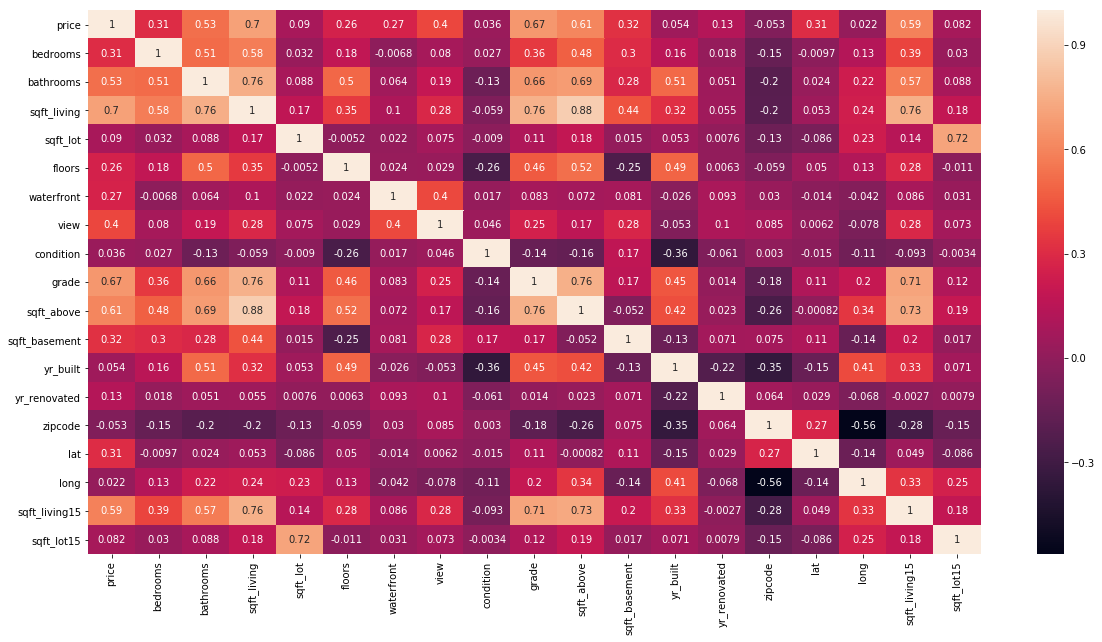

In [13]:
cor=df.corr()
f,ax=plt.subplots(figsize=(20,10))
sns.heatmap(cor,annot=True)

### Using boxplot to check how various features effect price:

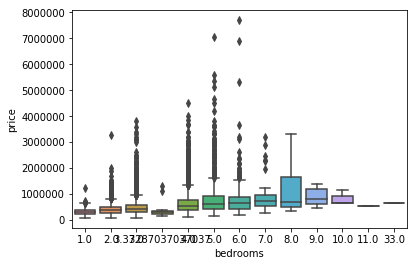

In [14]:
sns.boxplot(x='bedrooms',y='price',data=df)

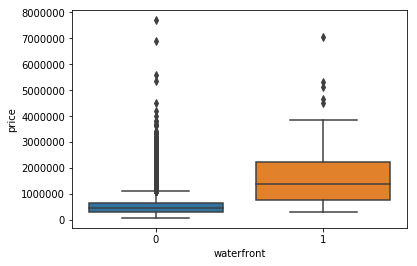

In [15]:
sns.boxplot(x='waterfront',y='price',data=df)

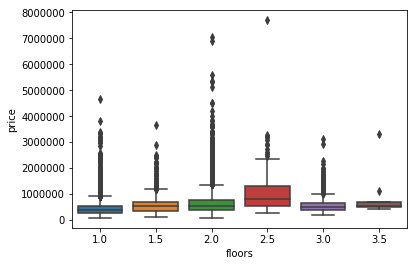

In [16]:
sns.boxplot(x='floors',y='price',data=df)

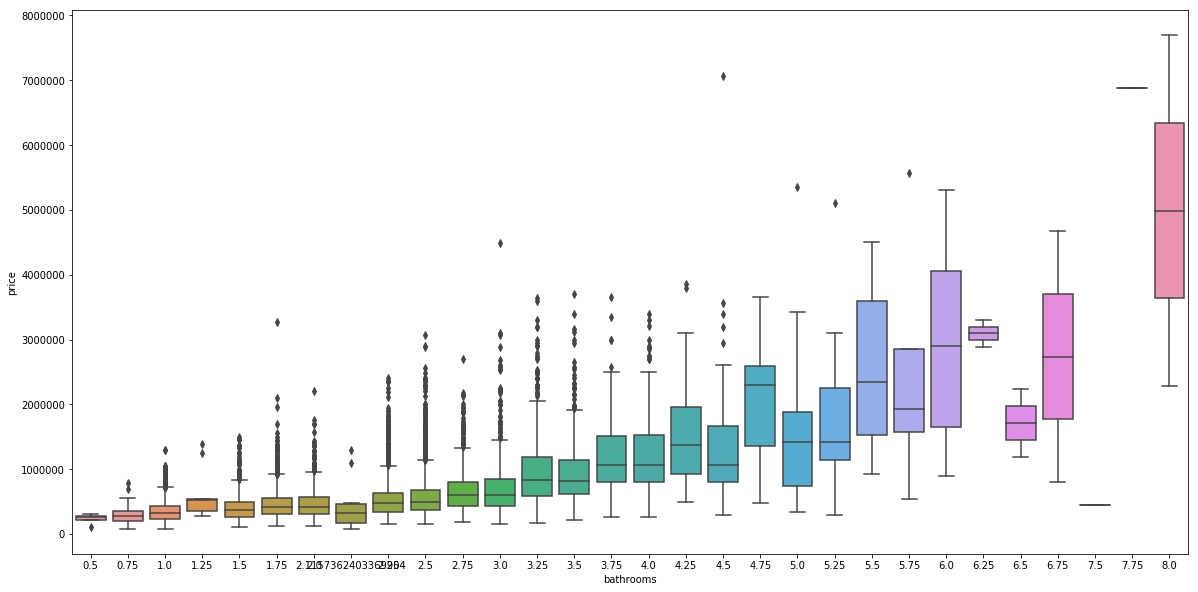

In [17]:
plt.figure(figsize=(20,10))
sns.boxplot(x='bathrooms',y='price',data=df)


### Using regplot in seaborn library to check how the following features change along with price

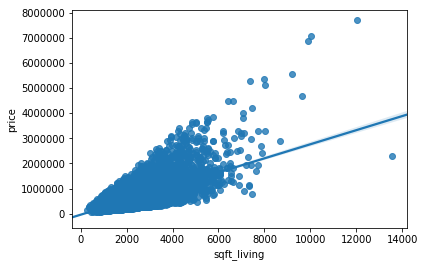

In [18]:
sns.regplot(x='sqft_living',y='price',data=df)

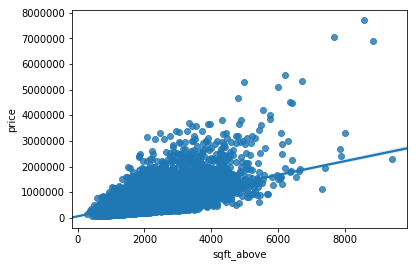

In [19]:
sns.regplot(x='sqft_above',y='price',data=df)

# Feature Set:


In [20]:
feature=['floors','waterfront','lat','bedrooms','sqft_basement','view','bathrooms','sqft_living15','sqft_above','grade','sqft_living']

In [24]:
X=df[feature].values
X[0:11]
y=df['price']



# Normalize Data:

In [25]:
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X

array([[-0.915427  , -0.08717263, -0.35257175, ..., -0.73470764,
        -0.55883575, -0.97983502],
       [ 0.93650577, -0.08717263,  1.16156823, ...,  0.46084084,
        -0.55883575,  0.53363434],
       [-0.915427  , -0.08717263,  1.28353661, ..., -1.22983377,
        -1.40958711, -1.42625404],
       ...,
       [ 0.93650577, -0.08717263,  0.24788796, ..., -0.92792759,
        -0.55883575, -1.15404732],
       [ 0.93650577, -0.08717263, -0.18441416, ..., -0.22750526,
         0.29191561, -0.52252773],
       [ 0.93650577, -0.08717263,  0.24572284, ..., -0.92792759,
        -0.55883575, -1.15404732]])

# Test-Train Split:

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# VARIOUS MODELLING:

## Multiple Linear Regression:

#### Fitting:

In [27]:

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### Prediction:

In [28]:
yhat=lm.predict(X_test)

#### Evaluation:

In [29]:
from sklearn.metrics import r2_score
r2_score(y_test,yhat)


0.6607555921862145

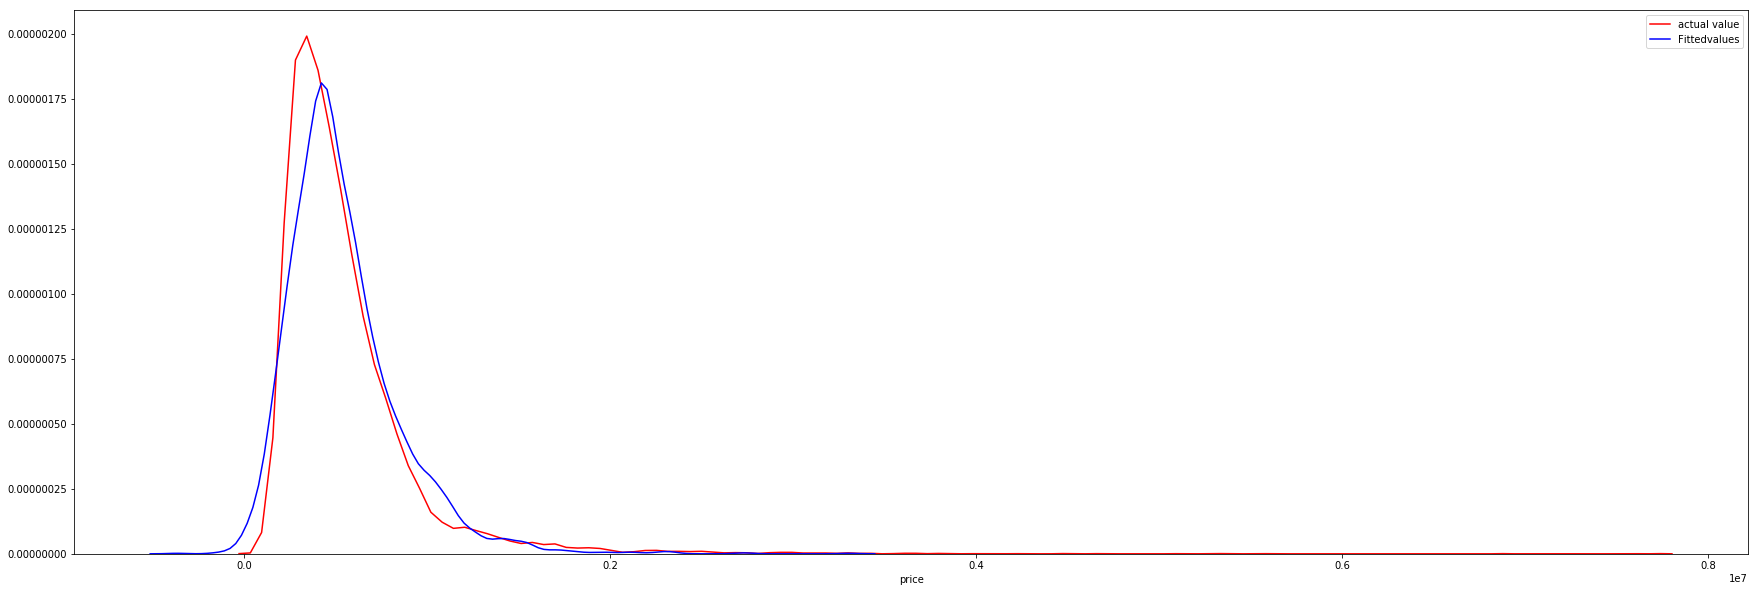

In [30]:
plt.figure(figsize=(30,10))
ax=sns.distplot(df['price'],hist=False,color='r',label='actual value')
sns.distplot(yhat,hist=False,color='b',label='Fittedvalues',ax=ax)



In [44]:
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

# PIPELINE:
## Polynomial Regression

In [31]:
# FOR DEGREE = 2
from sklearn.pipeline import Pipeline
Input=[('scale',StandardScaler()),('Polynomial',PolynomialFeatures(degree=2)),('mode',LinearRegression())]
pipe=Pipeline(Input)

### Fitting

In [32]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('Polynomial', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('mode', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

### Prediction

In [33]:
yhat=pipe.predict(X_test)

### Evaluation

In [34]:
from sklearn.metrics import r2_score
r2_score(y_test,yhat)

0.7307339597786373

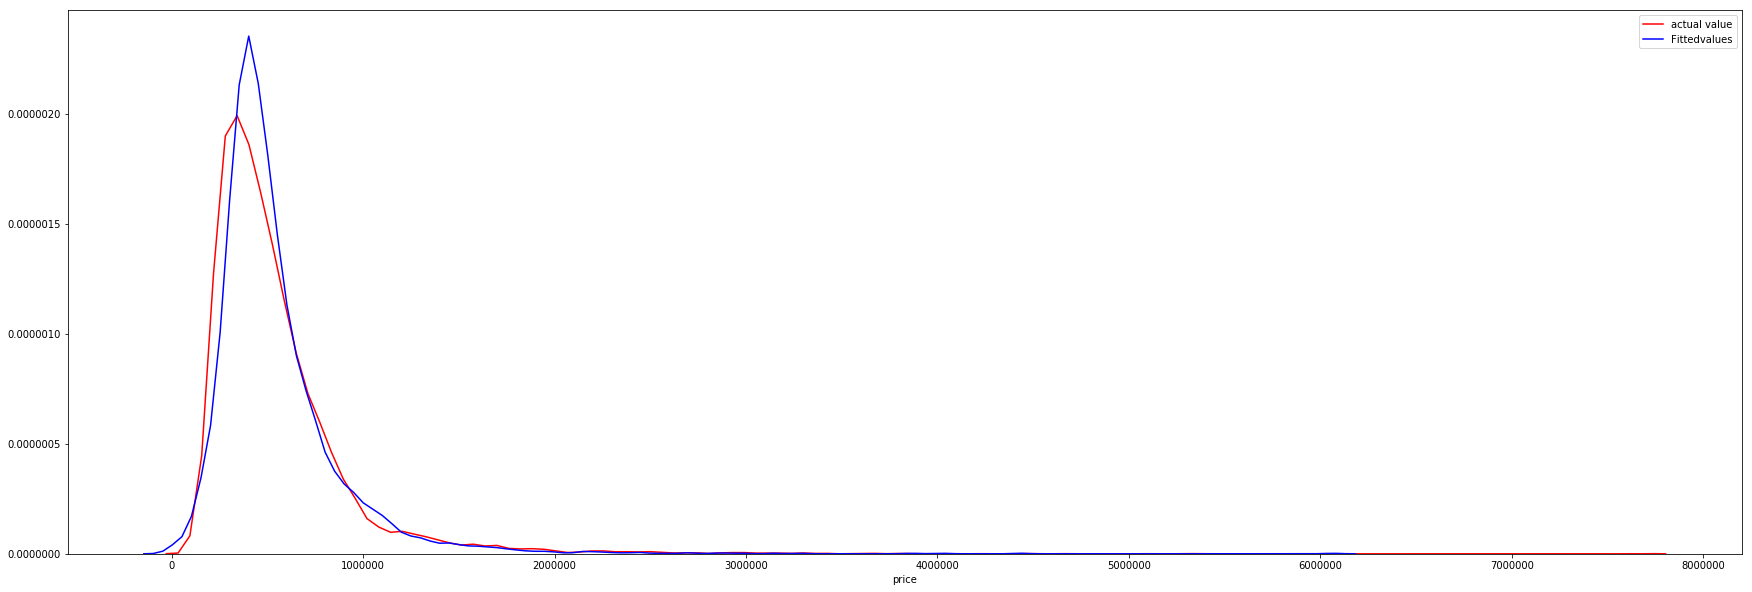

In [35]:
plt.figure(figsize=(30,10))
ax=sns.distplot(df['price'],hist=False,color='r',label='actual value')
sns.distplot(yhat,hist=False,color='b',label='Fittedvalues',ax=ax)

In [48]:
pipe.fit(X,y)

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('Polynomial', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)), ('mode', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

### Lets try for multiple values of degree:

In [36]:
k=5
for n in range(1,k+1):
    Input=[('scale',StandardScaler()),('Polynomial',PolynomialFeatures(degree=n)),('mode',LinearRegression())]
    pipe=Pipeline(Input)
    pipe.fit(X_train,y_train)
    yhat1=pipe.predict(X_test)
    eval=r2_score(y_test,yhat1)
    print("Value of R2_score when n=",n,"is",eval)

Value of R2_score when n= 1 is 0.6610317637431338
Value of R2_score when n= 2 is 0.7307339597786373
Value of R2_score when n= 3 is 0.6432113051791273
Value of R2_score when n= 4 is -2167850012979543.0
Value of R2_score when n= 5 is -14010364369365.033


#### From the above values we can evaluate that degree=2 is better fitted when compared with other values
#### For degree>3 values of R^2 is negative which refers to the fact that the model is overfitting

# Ridge Regression:

In [37]:
from sklearn.linear_model import Ridge
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(X_train,y_train)
yhat=RidgeModel.predict(X_test)

In [38]:
r2_score(y_test,yhat)

0.6607556579408205

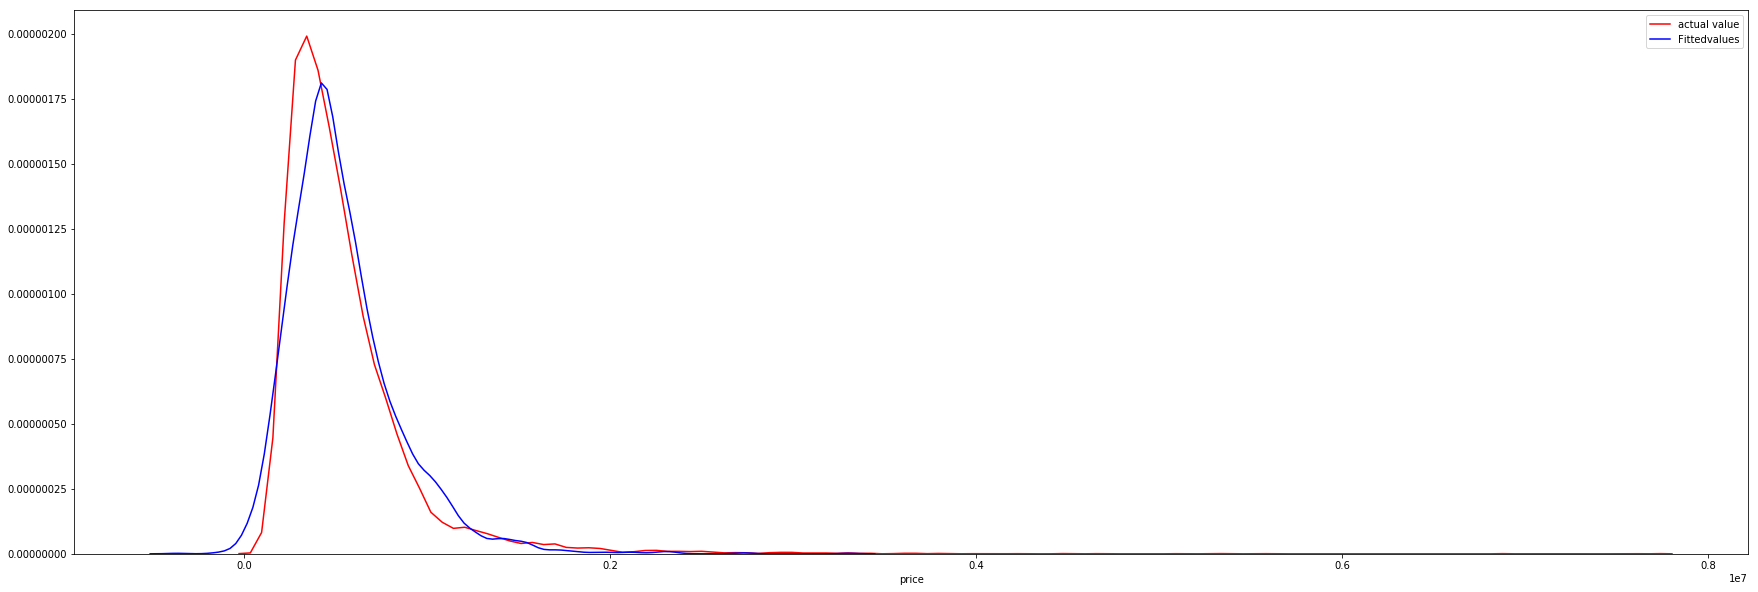

In [39]:
plt.figure(figsize=(30,10))
ax=sns.distplot(df['price'],hist=False,color='r',label='actual value')
sns.distplot(yhat,hist=False,color='b',label='Fittedvalues',ax=ax)

In [49]:
RidgeModel.fit(X,y)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

### Using GridSearchCV

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
parameters=[{'alpha':[0.001,0.1,1,10]}]
RR=Ridge()
Grid=GridSearchCV(RR,parameters)
Grid.fit(X_train,y_train)


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.1, 1, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
Grid.best_estimator_
scores=Grid.cv_results_
scores

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/envs/Python36/

{'mean_fit_time': array([0.0038836 , 0.0035096 , 0.00347265, 0.00349522]),
 'std_fit_time': array([4.74929131e-04, 7.55758900e-05, 8.90025068e-06, 1.15095854e-04]),
 'mean_score_time': array([0.00082405, 0.00068776, 0.00068514, 0.00074196]),
 'std_score_time': array([1.06966867e-04, 2.25624554e-06, 4.05700970e-06, 8.61526121e-05]),
 'param_alpha': masked_array(data=[0.001, 0.1, 1, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.001}, {'alpha': 0.1}, {'alpha': 1}, {'alpha': 10}],
 'split0_test_score': array([0.64277741, 0.64277737, 0.64277697, 0.64277274]),
 'split1_test_score': array([0.65729433, 0.65729437, 0.65729474, 0.65729817]),
 'split2_test_score': array([0.66776456, 0.66776456, 0.66776454, 0.66776407]),
 'mean_test_score': array([0.65594467, 0.65594467, 0.65594466, 0.65594423]),
 'std_test_score': array([0.01024565, 0.01024567, 0.01024585, 0.01024763]),
 'rank_test_score': array([1, 2, 3, 4], dtyp

In [43]:
scores['mean_test_score']

array([0.65594467, 0.65594467, 0.65594466, 0.65594423])


# CONCLUSION:

### 1.Multi linear regression, polynomial regression and ridge regression alogorithms are performed on the overall dataset.

### 2. Performed Data Cleaning and Data visualization on different features of the Dataset.

### 3. Evaluated each developed model on basis of R^2 score.

### 4. It is shown that Polynomial Regression showed better fitting when compared to Multiple Linear Regression and Ridge Regression with R^2 value of 0.730734